<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/stats/t-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

from google.colab import files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid", {"axes.grid" : False})

import scipy.stats as stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [2]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
df = pd.read_csv(link, delimiter=";")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

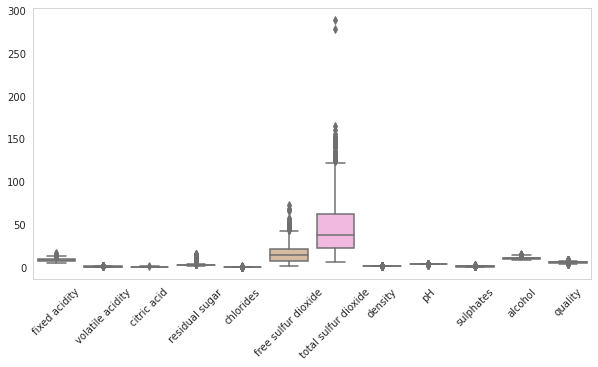

In [5]:
fig,ax = plt.subplots(1,figsize=(10,5))

ax = sns.boxplot(data=df, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [6]:
sulf200 = df[df["total sulfur dioxide"]>200]
sulf200

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


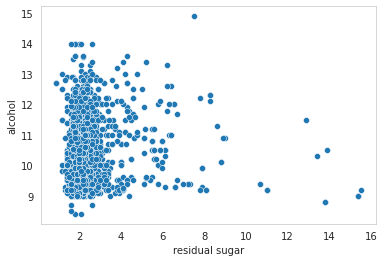

In [7]:
sns.scatterplot(x=df["residual sugar"], y=df["alcohol"], palette="pastel")
plt.show()

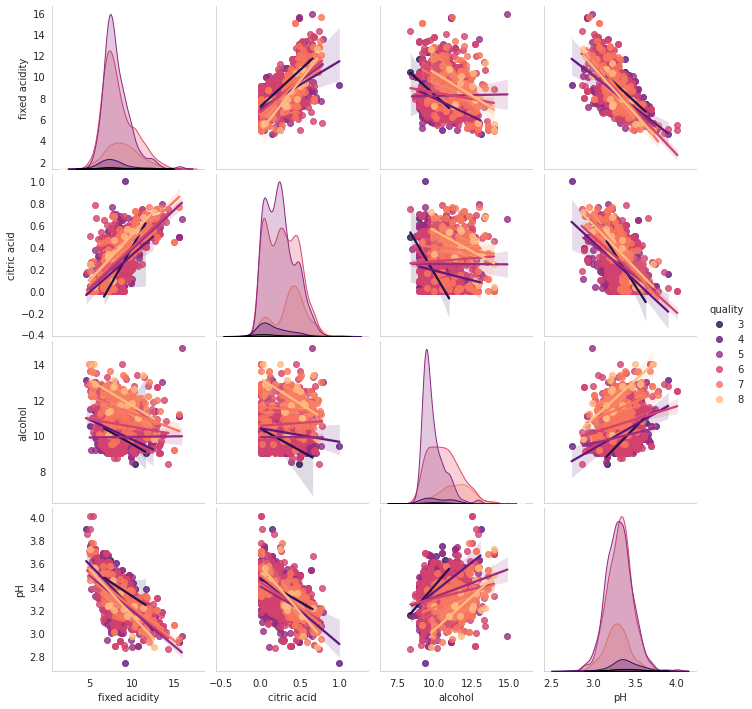

In [8]:
col = ["fixed acidity","citric acid","alcohol","pH","quality"]
sns.pairplot(df[col], kind="reg", hue="quality",palette="magma")
plt.show()

# T-test

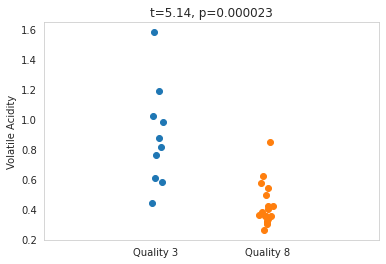

In [9]:
x = df["volatile acidity"][df["quality"]==3]
y = df["volatile acidity"][df["quality"]==8]

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,"o",
         np.random.randn(len(y))/30+1,y,"o")
plt.xlim([-1,2])
plt.xticks([0,1], labels=["Quality 3", "Quality 8"])
plt.ylabel("Volatile Acidity")
plt.title(f"t={ttest[0]:.2f}, p={ttest[1]:.6f}")

plt.show()

In [10]:
# Quality counter function

def quality_counter(data, n, qualcount, min, max):
  for i in range(min,max+1):
    qualcount[n] = len(data[data["quality"] == i])
    n += 1
  return qualcount

In [11]:
qualities = np.zeros(df["quality"].nunique())
min = df["quality"].min()
max = df["quality"].max()

qual = quality_counter(df, 0, qualities, min, max)
qual

array([ 10.,  53., 681., 638., 199.,  18.])

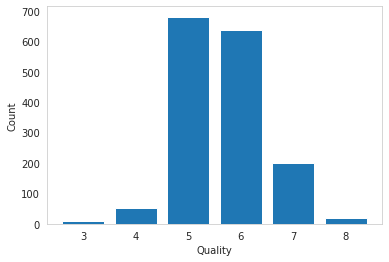

In [12]:
plt.bar(range(min,max+1), qual)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title
plt.show()

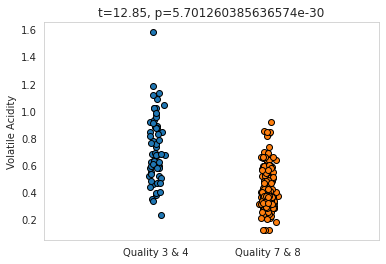

In [13]:
x = df["volatile acidity"][(df["quality"] == 3) | (df["quality"] == 4)]
y = df["volatile acidity"][(df["quality"] == 7) | (df["quality"] == 8)]

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,"o",
         np.random.randn(len(y))/30+1,y,"o", markeredgecolor="k")
plt.xlim([-1,2])
plt.xticks([0,1], labels=["Quality 3 & 4", "Quality 7 & 8"])
plt.ylabel("Volatile Acidity")
plt.title(f"t={ttest[0]:.2f}, p={ttest[1]}")

plt.show()

# Multiple regression

In [14]:
dep_var = df["quality"]
ind_var = df.drop(labels="quality",axis=1)

ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        14:06:50   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

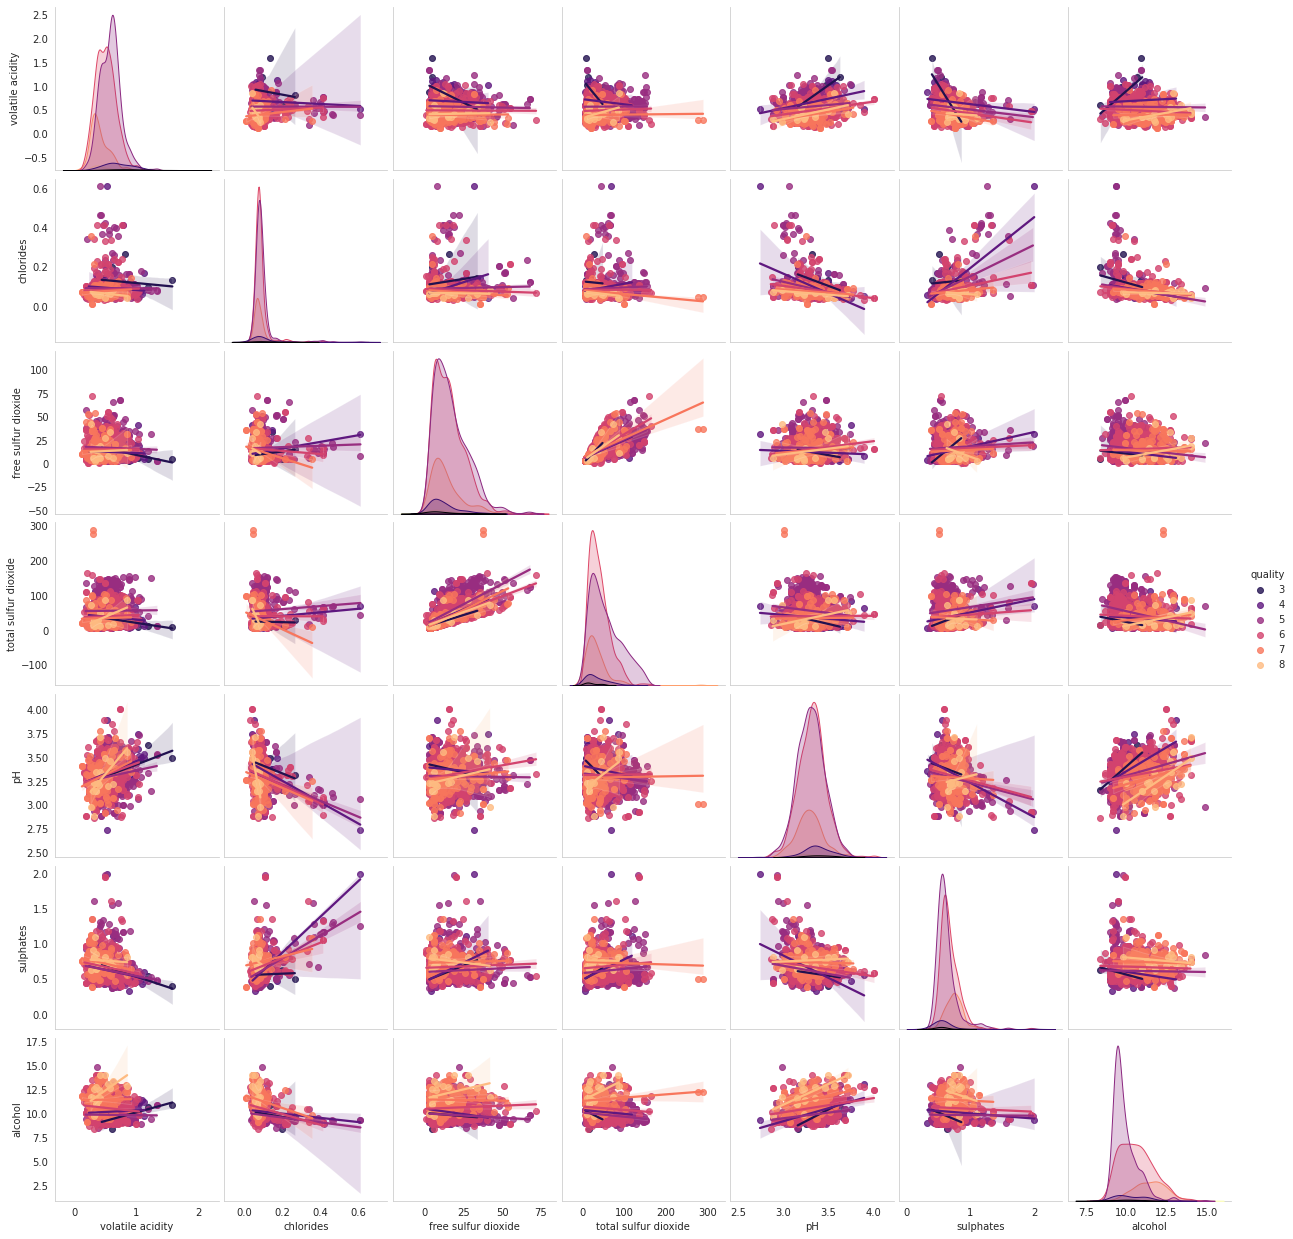

In [15]:
# Significant predictors from the std regression

sig_col = list(model.pvalues[model.pvalues < 0.05].keys())
sig_col.append("quality")
sns.pairplot(df[sig_col], kind="reg", hue="quality", palette="magma")

# Logistic Regression

In [17]:
binthresh = np.mean(df["quality"])

df["binquality"] = df["quality"] > binthresh

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [18]:
xcol = []
for key in df.keys():
  if key not in ["quality","binquality"]:
    xcol.append(key)

xcol

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [19]:
model_log = sm.Logit(df["binquality"],df[xcol])
results_log = model_log.fit(method = "newton")
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                           10
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                  0.2504
Time:                        14:09:14   Log-Likelihood:                -827.96
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                1.988e-112
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0952      0.063      1.508      0.132      -0.029       0.219
volatile acidity        -3.3200      0.484     -6.853      0.000      -4.269      -2.371
citric acid             -1.2788      0.564     -2.269      0.023      -2.383      -0.174
residual sugar           0.0381      0.043      0.879      0.379      -0.047       0.123
chlorides               -3.9867      1.566     -2.546      0.011      -7.056      -0.917
free sulfur dioxide      0.0226      0.008      2.749      0.006       0.006       0.039
total sulfur dioxide    -0.0165      0.003     -5.728      0.000      -0.022      -0.011
density                 -7.0983      2.359     -3.008      0.003     -11.723      -2.474
pH                      -0.5946      0.601     -0.990      0.322      -1.772       0.583
sulphates                2.7362      0.438      6.245      0.000       1.877       3.595
alcohol                  0.9065      0.074     12.212      0.000       0.761       1.052
========================================================================================
"""

In [21]:
# Significant predictors from the logistic regression:

sig_col_log = list(results_log.pvalues[results_log.pvalues < 0.05].keys())
sig_col_log

['volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

# Gaussian trandformation

In [37]:
n = 500

x = np.cumsum(np.random.randn(n))
y = (stats.rankdata(x)/(n+1)-0.5) * 2
y = np.arctanh(y)

print(np.min(y), np.max(y))

-3.1073040492110966 3.107304049211083


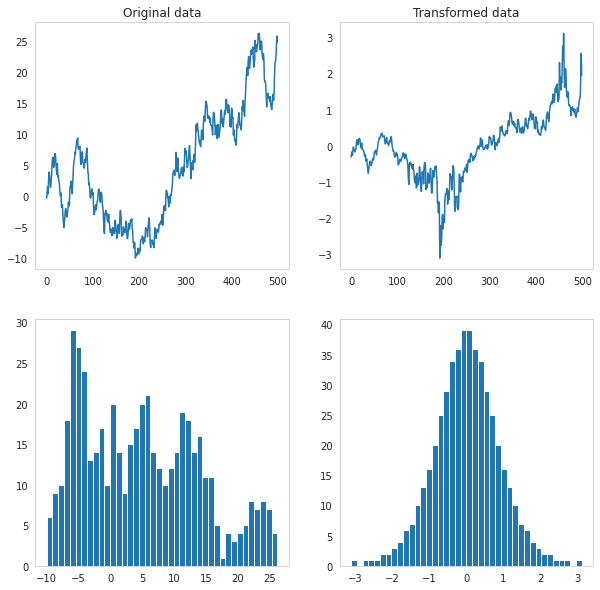

In [40]:
fig,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(x)
ax[0,0].set_title("Original data")

ax[0,1].set_title("Transformed data")
ax[0,1].plot(y)

ax[1,0].hist(x, bins = 40)
ax[1,1].hist(y, bins =40)

plt.show()

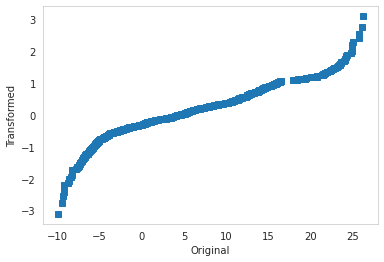

In [41]:
plt.plot(x,y,"s")
plt.xlabel("Original")
plt.ylabel("Transformed")
plt.show()